# Activité préparatoire - Tris

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

#### Question 1 - Définir les fonctions permettant de trier une liste par insertion. 

In [2]:
def insere(t, j):
    k, a = j, t[j]
    while k > 0 and a < t[k-1]:
        t[k] = t[k-1]
        k = k-1
    t[k] = a
    
def insertionSort(t):
    for j in range(1, len(t)):
        insere(t, j)

In [3]:
tab = [17, 53, 37, 44, 73, 87, 12, 6, 85, 98]
insertionSort(tab)
print(tab)

[6, 12, 17, 37, 44, 53, 73, 85, 87, 98]


#### Question 2 - Définir les fonctions permettant de trier une liste par le tri rapide.

In [4]:
def segmente(t, i, j):
    p = t[j-1] # On prend comme pivot le dernier élément de la sous liste. 
    a = i
    for b in range(i, j-1):
        if t[b] < p:
            t[a], t[b] = t[b], t[a]
            a += 1
    t[a], t[j-1] = t[j-1], t[a] # On positionne le pivot "à sa place".
    return a # On retourne l'index du pivot. Le tableau a été modifié en place. 
def quickSort(t, i, j):
    if i + 1 < j:
        a = segmente(t, i, j)
        quickSort(t, i, a)
        quickSort(t, a + 1, j)

In [5]:
tab = [17, 53, 37, 44, 73, 87, 12, 6, 85, 98]
quickSort(tab, 0, len(tab))
print(tab)

[6, 12, 17, 37, 44, 53, 73, 85, 87, 98]


#### Question 3 - Définir les fonctions permettant de trier une liste par le tri fusion.

In [6]:
def merge(a, b):
    p, q = len(a), len(b)
    c = [None] * (p + q)
    i = j = 0
    for k in range(p+q):
        if j >= q:
            c[k] = a[i]
            i += 1
        elif i >= p:
            c[k] = b[j]
            j += 1
        elif a[i] < b[j]:
            c[k] = a[i]
            i += 1
        else:
            c[k] = b[j]
            j += 1
    return c

def mergeSort(t):
    n = len(t)
    if n < 2:
        return t
    a = mergeSort(t[:n//2])
    b = mergeSort(t[n//2:])
    return merge(a, b)

In [7]:
tab = [17, 53, 37, 44, 73, 87, 12, 6, 85, 98]
t = mergeSort(tab)
print(t)

[6, 12, 17, 37, 44, 53, 73, 85, 87, 98]


Comparaison des tris

In [12]:
import time
N = 200
t_insertion =[]

for i in range(1,N):
    temps = []
    for j in range(10):
        tab = [rd.randrange(N) for k in range(i)]
        start = time.time()
        insertionSort(tab)    
        end = time.time()
        temps.append(end - start)
    t_insertion.append(sum(temps)/len(temps))

In [16]:
N = 1000
t_quick =[]
for i in range(1,N):
    temps = []
    for j in range(10):
        tab = [rd.randrange(N) for k in range(i)]
        start = time.time()
        quickSort(tab, 0, len(tab))
        end = time.time()
        temps.append(end - start)
    t_quick.append(sum(temps)/len(temps))

In [18]:
t_merge =[]
for i in range(1,N):
    temps = []
    for j in range(10):
        tab = [rd.randrange(N) for k in range(i)]
        start = time.time()
        mergeSort(tab)
        end = time.time()
        temps.append(end - start)
    t_merge.append(sum(temps)/len(temps))

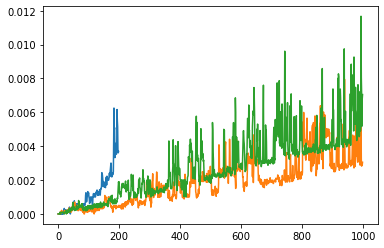

In [19]:
plt.plot(t_insertion)
plt.plot(t_quick)
plt.plot(t_merge)